# Experiments using tf.keras model subclassing and eager

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tfe = tf.contrib.eager

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

In [0]:
mnist = tf.keras.datasets.mnist

# Dataset will be cached locally after you run this code
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# These types are required for the operation we use to compute
# loss. Omit, and you shall receive a cryptic error message.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [0]:
buffer_size = 5000
batch_size = 100

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size)
train_dataset = train_dataset.batch(batch_size)

In [0]:
def loss(log, lab):
  # FIX ME
  # You will need to modify this function, of course.
  # Best bet, use tf.nn.sparse_softmax_cross_entropy_with_logits
  # though if you're interested, you can write your own.
    result = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = lab, logits= log))
    return result

In [0]:
def compute_accuracy(logits, labels):
    # You shoud not need to modify this function
    predictions = tf.argmax(logits, axis=1)
    batch_size = int(logits.shape[0])
    return tf.reduce_sum(
      tf.cast(tf.equal(predictions, labels), dtype=tf.float32)) / batch_size

In [0]:
def train(model, images, labels):
  # You should not need to modify this function
  
    with tf.GradientTape() as tape:
        logits = model(images)
        loss_value = loss(logits, labels)

        grads = tape.gradient(loss_value, model.variables)
        optimizer.apply_gradients(zip(grads, model.variables))
  
    return loss_value

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2)

***Linear Model***

In [0]:
class LinearModel(tf.keras.Model):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense_1 = tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    # FIX ME
    # add some layers to your model

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        return x

In [73]:
model = LinearModel()

accuracy_dict_linear ={}
loss_dict_linear = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_linear[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_linear[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 1.9288
Step #200	Loss: 1.7877
Step #300	Loss: 1.7938
Step #400	Loss: 1.7683
Step #500	Loss: 1.7512
Step #600	Loss: 1.6283
Accuracy #0.84

Epoch #1
Step #700	Loss: 1.6254
Step #800	Loss: 1.6396
Step #900	Loss: 1.6382
Step #1000	Loss: 1.6679
Step #1100	Loss: 1.7128
Step #1200	Loss: 1.5776
Accuracy #0.89

Epoch #2
Step #1300	Loss: 1.6008
Step #1400	Loss: 1.6046
Step #1500	Loss: 1.5834
Step #1600	Loss: 1.6117
Step #1700	Loss: 1.5622
Step #1800	Loss: 1.6069
Accuracy #0.90

Epoch #3
Step #1900	Loss: 1.6359
Step #2000	Loss: 1.6142
Step #2100	Loss: 1.5846
Step #2200	Loss: 1.6065
Step #2300	Loss: 1.5675
Step #2400	Loss: 1.5513
Accuracy #0.91

Epoch #4
Step #2500	Loss: 1.5675
Step #2600	Loss: 1.6193
Step #2700	Loss: 1.5721
Step #2800	Loss: 1.6190
Step #2900	Loss: 1.5460
Step #3000	Loss: 1.5478
Accuracy #0.91

Epoch #5
Step #3100	Loss: 1.5938
Step #3200	Loss: 1.5434
Step #3300	Loss: 1.5943
Step #3400	Loss: 1.5922
Step #3500	Loss: 1.5496
Step #3600	Loss: 1.5363
Accuracy #0

# Linear Model:Loss

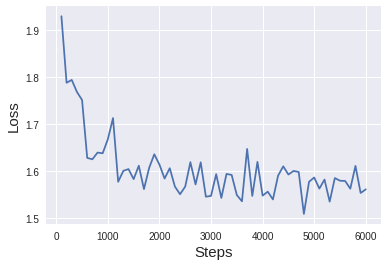

In [74]:
loss_list_linear = sorted(loss_dict_linear.items())
x, y = zip(*loss_list_linear) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

# Linear Model: Accuracy

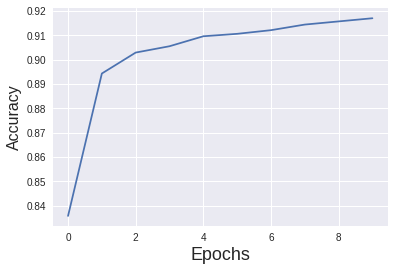

In [75]:
acc_list_linear = sorted(accuracy_dict_linear.items())

x, y = zip(*acc_list_linear) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

# Deep Model

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [77]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 0.4238
Step #200	Loss: 0.4416
Step #300	Loss: 0.2202
Step #400	Loss: 0.2918
Step #500	Loss: 0.1505
Step #600	Loss: 0.1783
Accuracy #0.95

Epoch #1
Step #700	Loss: 0.2669
Step #800	Loss: 0.1055
Step #900	Loss: 0.1447
Step #1000	Loss: 0.1852
Step #1100	Loss: 0.1549
Step #1200	Loss: 0.1704
Accuracy #0.96

Epoch #2
Step #1300	Loss: 0.0977
Step #1400	Loss: 0.1362
Step #1500	Loss: 0.0698
Step #1600	Loss: 0.1646
Step #1700	Loss: 0.1265
Step #1800	Loss: 0.1033
Accuracy #0.97

Epoch #3
Step #1900	Loss: 0.0475
Step #2000	Loss: 0.0957
Step #2100	Loss: 0.0596
Step #2200	Loss: 0.0803
Step #2300	Loss: 0.1568
Step #2400	Loss: 0.0656
Accuracy #0.97

Epoch #4
Step #2500	Loss: 0.0748
Step #2600	Loss: 0.0567
Step #2700	Loss: 0.0571
Step #2800	Loss: 0.0376
Step #2900	Loss: 0.1748
Step #3000	Loss: 0.0484
Accuracy #0.97

Epoch #5
Step #3100	Loss: 0.0568
Step #3200	Loss: 0.0430
Step #3300	Loss: 0.0576
Step #3400	Loss: 0.0524
Step #3500	Loss: 0.0669
Step #3600	Loss: 0.0310
Accuracy #0

***Deep model: Loss***

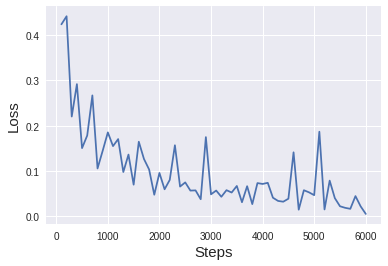

In [80]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

# Deep Model: Accuracy

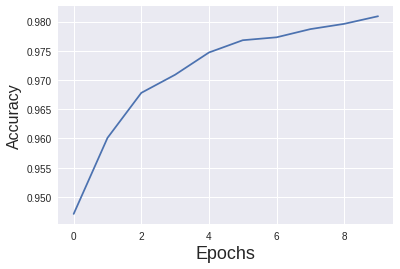

In [79]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

#***Design and run experiments to compare:***
***High, low, and reasonable learning rates.***

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3)

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x
      


In [81]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 0.4110
Step #200	Loss: 0.2171
Step #300	Loss: 0.2122
Step #400	Loss: 0.2863
Step #500	Loss: 0.2434
Step #600	Loss: 0.1546
Accuracy #0.95

Epoch #1
Step #700	Loss: 0.1654
Step #800	Loss: 0.1915
Step #900	Loss: 0.0973
Step #1000	Loss: 0.1450
Step #1100	Loss: 0.0531
Step #1200	Loss: 0.0642
Accuracy #0.96

Epoch #2
Step #1300	Loss: 0.1670
Step #1400	Loss: 0.1707
Step #1500	Loss: 0.1246
Step #1600	Loss: 0.1419
Step #1700	Loss: 0.1380
Step #1800	Loss: 0.0720
Accuracy #0.97

Epoch #3
Step #1900	Loss: 0.0409
Step #2000	Loss: 0.1043
Step #2100	Loss: 0.1135
Step #2200	Loss: 0.0492
Step #2300	Loss: 0.0984
Step #2400	Loss: 0.0414
Accuracy #0.97

Epoch #4
Step #2500	Loss: 0.0362
Step #2600	Loss: 0.0845
Step #2700	Loss: 0.0705
Step #2800	Loss: 0.0881
Step #2900	Loss: 0.0835
Step #3000	Loss: 0.1020
Accuracy #0.97

Epoch #5
Step #3100	Loss: 0.1235
Step #3200	Loss: 0.0323
Step #3300	Loss: 0.0785
Step #3400	Loss: 0.0948
Step #3500	Loss: 0.0735
Step #3600	Loss: 0.0952
Accuracy #0

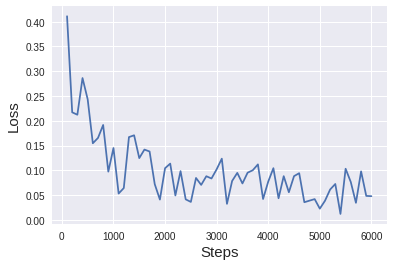

In [82]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

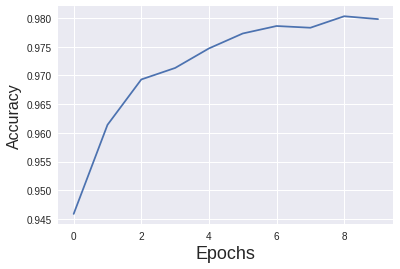

In [83]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3)

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [86]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 0.3366
Step #200	Loss: 0.2872
Step #300	Loss: 0.1684
Step #400	Loss: 0.1383
Step #500	Loss: 0.1959
Step #600	Loss: 0.1525
Accuracy #0.95

Epoch #1
Step #700	Loss: 0.1228
Step #800	Loss: 0.1241
Step #900	Loss: 0.1190
Step #1000	Loss: 0.1610
Step #1100	Loss: 0.1388
Step #1200	Loss: 0.0728
Accuracy #0.97

Epoch #2
Step #1300	Loss: 0.0350
Step #1400	Loss: 0.0792
Step #1500	Loss: 0.0983
Step #1600	Loss: 0.1243
Step #1700	Loss: 0.0789
Step #1800	Loss: 0.0269
Accuracy #0.97

Epoch #3
Step #1900	Loss: 0.0929
Step #2000	Loss: 0.0612
Step #2100	Loss: 0.0212
Step #2200	Loss: 0.0950
Step #2300	Loss: 0.0523
Step #2400	Loss: 0.1281
Accuracy #0.98

Epoch #4
Step #2500	Loss: 0.0561
Step #2600	Loss: 0.1030
Step #2700	Loss: 0.0372
Step #2800	Loss: 0.1259
Step #2900	Loss: 0.0448
Step #3000	Loss: 0.0891
Accuracy #0.98

Epoch #5
Step #3100	Loss: 0.0222
Step #3200	Loss: 0.0226
Step #3300	Loss: 0.0107
Step #3400	Loss: 0.0585
Step #3500	Loss: 0.0618
Step #3600	Loss: 0.0310
Accuracy #0

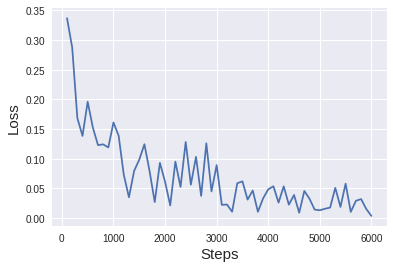

In [87]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

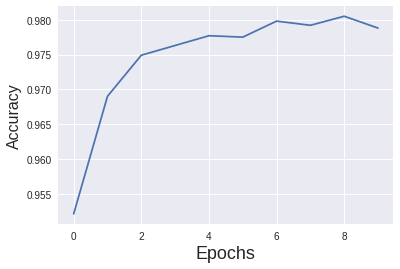

In [88]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0)

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.relu)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [91]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 0.4409
Step #200	Loss: 0.2471
Step #300	Loss: 0.1759
Step #400	Loss: 0.1525
Step #500	Loss: 0.1969
Step #600	Loss: 0.1104
Accuracy #0.96

Epoch #1
Step #700	Loss: 0.0990
Step #800	Loss: 0.0652
Step #900	Loss: 0.0805
Step #1000	Loss: 0.0702
Step #1100	Loss: 0.0742
Step #1200	Loss: 0.0516
Accuracy #0.97

Epoch #2
Step #1300	Loss: 0.0771
Step #1400	Loss: 0.0248
Step #1500	Loss: 0.0489
Step #1600	Loss: 0.0435
Step #1700	Loss: 0.0389
Step #1800	Loss: 0.0388
Accuracy #0.98

Epoch #3
Step #1900	Loss: 0.0395
Step #2000	Loss: 0.0357
Step #2100	Loss: 0.0920
Step #2200	Loss: 0.1122
Step #2300	Loss: 0.0215
Step #2400	Loss: 0.0087
Accuracy #0.98

Epoch #4
Step #2500	Loss: 0.0306
Step #2600	Loss: 0.0317
Step #2700	Loss: 0.0155
Step #2800	Loss: 0.0446
Step #2900	Loss: 0.0542
Step #3000	Loss: 0.0070
Accuracy #0.98

Epoch #5
Step #3100	Loss: 0.0047
Step #3200	Loss: 0.0401
Step #3300	Loss: 0.0299
Step #3400	Loss: 0.0072
Step #3500	Loss: 0.0270
Step #3600	Loss: 0.0245
Accuracy #0

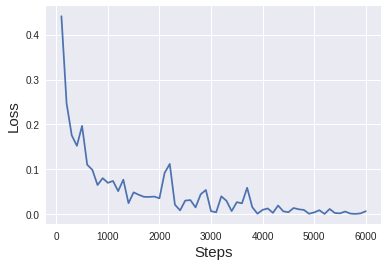

In [92]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

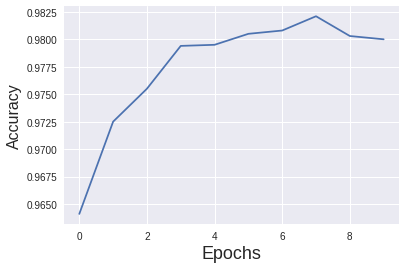

In [93]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

# Different activation functions.

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.softmax)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [95]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 2.3016
Step #200	Loss: 2.3099
Step #300	Loss: 2.2867
Step #400	Loss: 2.2001
Step #500	Loss: 1.5921
Step #600	Loss: 1.2832
Accuracy #0.48

Epoch #1
Step #700	Loss: 1.1796
Step #800	Loss: 1.1102
Step #900	Loss: 1.0845
Step #1000	Loss: 0.9926
Step #1100	Loss: 1.1147
Step #1200	Loss: 1.1315
Accuracy #0.57

Epoch #2
Step #1300	Loss: 1.1064
Step #1400	Loss: 0.9547
Step #1500	Loss: 1.0144
Step #1600	Loss: 1.1418
Step #1700	Loss: 1.0689
Step #1800	Loss: 0.9634
Accuracy #0.57

Epoch #3
Step #1900	Loss: 1.0477
Step #2000	Loss: 1.0914
Step #2100	Loss: 1.1309
Step #2200	Loss: 0.7927
Step #2300	Loss: 0.8866
Step #2400	Loss: 0.7307
Accuracy #0.63

Epoch #4
Step #2500	Loss: 1.0460
Step #2600	Loss: 0.7644
Step #2700	Loss: 0.7742
Step #2800	Loss: 0.9228
Step #2900	Loss: 0.8200
Step #3000	Loss: 0.6854
Accuracy #0.68

Epoch #5
Step #3100	Loss: 0.7576
Step #3200	Loss: 0.7757
Step #3300	Loss: 0.8004
Step #3400	Loss: 0.7677
Step #3500	Loss: 1.0171
Step #3600	Loss: 0.7875
Accuracy #0

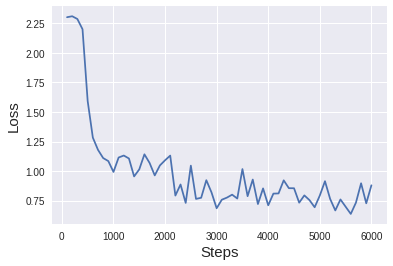

In [96]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

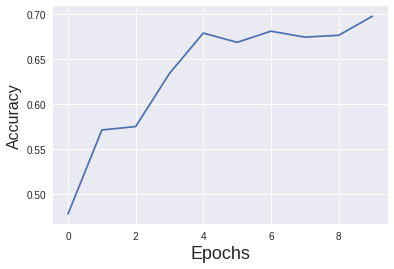

In [97]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

***Accuracy: 70%***

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.sigmoid)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [99]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 0.5743
Step #200	Loss: 0.3658
Step #300	Loss: 0.4583
Step #400	Loss: 0.2785
Step #500	Loss: 0.3516
Step #600	Loss: 0.2054
Accuracy #0.93

Epoch #1
Step #700	Loss: 0.2612
Step #800	Loss: 0.1717
Step #900	Loss: 0.2255
Step #1000	Loss: 0.2252
Step #1100	Loss: 0.1569
Step #1200	Loss: 0.0621
Accuracy #0.95

Epoch #2
Step #1300	Loss: 0.2524
Step #1400	Loss: 0.0759
Step #1500	Loss: 0.1794
Step #1600	Loss: 0.1400
Step #1700	Loss: 0.1130
Step #1800	Loss: 0.1074
Accuracy #0.96

Epoch #3
Step #1900	Loss: 0.0834
Step #2000	Loss: 0.1127
Step #2100	Loss: 0.0714
Step #2200	Loss: 0.1190
Step #2300	Loss: 0.0553
Step #2400	Loss: 0.0632
Accuracy #0.96

Epoch #4
Step #2500	Loss: 0.0866
Step #2600	Loss: 0.0804
Step #2700	Loss: 0.1344
Step #2800	Loss: 0.0772
Step #2900	Loss: 0.1164
Step #3000	Loss: 0.1000
Accuracy #0.97

Epoch #5
Step #3100	Loss: 0.0306
Step #3200	Loss: 0.0492
Step #3300	Loss: 0.0421
Step #3400	Loss: 0.0877
Step #3500	Loss: 0.0803
Step #3600	Loss: 0.0634
Accuracy #0

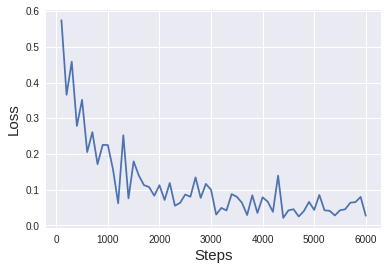

In [100]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

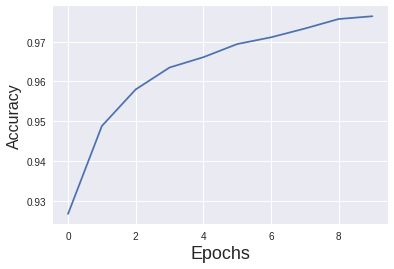

In [101]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

***Accuracy: 98%***

In [0]:
class DeepModel(tf.keras.Model):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten  = tf.keras.layers.Flatten()
        self.dense_1  = tf.keras.layers.Dense(512, activation=tf.nn.tanh)
        self.droupout = tf.keras.layers.Dropout(0.2)
        self.dense_2  = tf.keras.layers.Dense(10)
   

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.droupout(x)
        x = self.dense_2(x)
        return x

In [103]:
model = DeepModel()


loss_dict_deep = {}
accuracy_dict_deep = {}

epochs = 10
step_counter = 0

for epoch_n in range(epochs):
  print('Epoch #%d' % (epoch_n))
  for (batch, (images, labels)) in enumerate(train_dataset):
    loss_value = train(model, images, labels)
    step_counter +=1
  
    if step_counter % 100 == 0:
      print('Step #%d\tLoss: %.4f' % (step_counter, loss_value))
      loss_dict_deep[step_counter] = loss_value

  test_accuracy = compute_accuracy(model(x_test), y_test)
  print('Accuracy #%.2f\n' % (test_accuracy))
  accuracy_dict_deep[epoch_n] = test_accuracy

Epoch #0
Step #100	Loss: 3.3684
Step #200	Loss: 4.0215
Step #300	Loss: 2.7848
Step #400	Loss: 2.0284
Step #500	Loss: 1.2254
Step #600	Loss: 0.2292
Accuracy #0.93

Epoch #1
Step #700	Loss: 3.6676
Step #800	Loss: 4.8589
Step #900	Loss: 0.5793
Step #1000	Loss: 0.7847
Step #1100	Loss: 1.1604
Step #1200	Loss: 0.6113
Accuracy #0.94

Epoch #2
Step #1300	Loss: 0.8401
Step #1400	Loss: 1.3637
Step #1500	Loss: 1.2162
Step #1600	Loss: 1.3304
Step #1700	Loss: 0.7198
Step #1800	Loss: 0.3079
Accuracy #0.94

Epoch #3
Step #1900	Loss: 0.6829
Step #2000	Loss: 0.1462
Step #2100	Loss: 0.4382
Step #2200	Loss: 0.6022
Step #2300	Loss: 0.7583
Step #2400	Loss: 0.4395
Accuracy #0.95

Epoch #4
Step #2500	Loss: 0.5744
Step #2600	Loss: 0.1956
Step #2700	Loss: 0.2329
Step #2800	Loss: 0.4471
Step #2900	Loss: 0.9659
Step #3000	Loss: 0.7672
Accuracy #0.94

Epoch #5
Step #3100	Loss: 0.7304
Step #3200	Loss: 0.3450
Step #3300	Loss: 0.1407
Step #3400	Loss: 0.0147
Step #3500	Loss: 0.0624
Step #3600	Loss: 0.2252
Accuracy #0

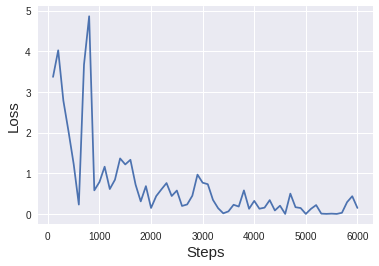

In [104]:
loss_list_deep = sorted(loss_dict_deep.items())

x, y = zip(*loss_list_deep) 

plt.plot(x, y)
plt.xlabel('Steps', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.show()

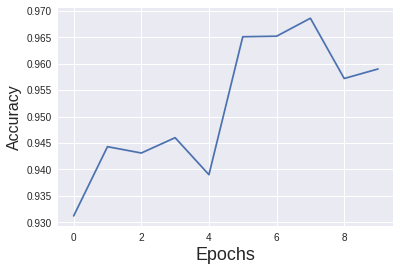

In [105]:
acc_list_deep = sorted(accuracy_dict_deep.items())

x, y = zip(*acc_list_deep) 

plt.plot(x, y)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

***Accuracy:96%***

# Observations

***A] Different learning rates:***
 

1.By using different learning rates  to train linear model , illustrates what is usually the ideal learning rate to train your model


2.By observing diffrent values , we can conclude that, lower the learning rate, higher the accuracy

***B] Different activation functions:***



1. Every activation function has different properties and might give different outputs depending on the complexity of the model.from that we can conculd that there is no specific rule for picking an activation function 
    e.g. For Sigmoid: The range of the sigmoid function is from 0 to 1 and it is generally used for binary classification 

2.However, considering the above deep model case where two different dense layer exist, adding a relu activation provided the best output i.e. 0.98

3.Thus, we can conclude that for a neural network, adding a relu activation function between layers can give the best result because of it's non-saturating property, also, it is faster than other activation functions.